# AirBnB Regression Challenge

# I. Data Exploration & II. Data Preparation

You will make a regression on the Airbnb dataset. The airbnb dataset for Paris can be downloaded [here](http://data.insideairbnb.com/france/ile-de-france/paris/2020-08-22/data/listings.csv.gz).

First, you will explore and prepare the data.

Follow at least the following steps:
- load the data with pandas
- have a look at the features, the missing data, the kind of data (categorical, quantitative, unstructured...)
- Are there duplicates?

Also display some plots:
- Plot the distribution of the prices (warning, the data format might need some work)
- Plot a heatmap of the geolocation of apartments with price in false color
- Plot correlation of the price to the number of beds

In [1]:
# TODO: Load and explore the data
import pandas as pd
listings_AirBnb = pd.read_csv("listings.csv.gz")

In [2]:
listings_AirBnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67581 entries, 0 to 67580
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67581 non-null  int64  
 1   listing_url                                   67581 non-null  object 
 2   scrape_id                                     67581 non-null  int64  
 3   last_scraped                                  67581 non-null  object 
 4   name                                          67517 non-null  object 
 5   description                                   66222 non-null  object 
 6   neighborhood_overview                         41298 non-null  object 
 7   picture_url                                   67580 non-null  object 
 8   host_id                                       67581 non-null  int64  
 9   host_url                                      67581 non-null 

In [3]:
#Dropping useless features or unmanageable ones
listings_AirBnb = listings_AirBnb.drop(columns=['license', 'calendar_updated','bathrooms','neighbourhood_group_cleansed',
                                               'id', 'listing_url', 'scrape_id', 'name', 'description', 'picture_url',
                                               'host_id', 'host_url', 'host_name','host_since', 'host_thumbnail_url',
                                               'host_picture_url', 'last_scraped', 'host_about', 'host_location', 'calendar_last_scraped',
                                               'neighborhood_overview','neighbourhood', 'property_type','host_neighbourhood',
                                               'host_response_time','bathrooms_text','amenities','host_verifications'])

In [4]:
###Processing 
listings_AirBnb['day_first_review'] = pd.to_datetime(listings_AirBnb['first_review']).sub(pd.Timestamp('2010-01-01')).dt.days
listings_AirBnb['day_first_review'] = listings_AirBnb['day_first_review'].fillna(listings_AirBnb['day_first_review'].mean())

listings_AirBnb['day_last_review'] = pd.to_datetime(listings_AirBnb['last_review']).sub(pd.Timestamp('2010-01-01')).dt.days
listings_AirBnb['day_last_review'] = listings_AirBnb['day_last_review'].fillna(listings_AirBnb['day_last_review'].mean())

listings_AirBnb = listings_AirBnb.drop(columns=['first_review', 'last_review'])

In [5]:
###Transformation string to float

# Host response rate %
listings_AirBnb['host_response_rate'] = listings_AirBnb['host_response_rate'].str[:-1].astype('float')
listings_AirBnb['host_response_rate'] = listings_AirBnb['host_response_rate'].fillna(listings_AirBnb['host_response_rate'].mean())

# Host acceptance rate %
listings_AirBnb['host_acceptance_rate'] = listings_AirBnb['host_acceptance_rate'].str[:-1].astype('float')
listings_AirBnb['host_acceptance_rate'] = listings_AirBnb['host_acceptance_rate'].fillna(listings_AirBnb['host_acceptance_rate'].mean())

# Price $
listings_AirBnb['price'] = listings_AirBnb.price.str[1:-3].str.replace(",","", 10).astype('float')

In [7]:
#Handling NAs
listings_AirBnb = listings_AirBnb.dropna(subset=["review_scores_value"])
listings_AirBnb = listings_AirBnb.dropna(subset=["bedrooms"])
listings_AirBnb = listings_AirBnb.dropna()

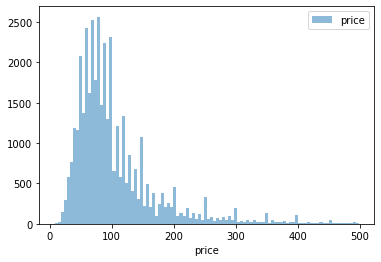

In [8]:
#Plot price distribution
#Deleting price outliers
listings_AirBnb = listings_AirBnb[listings_AirBnb['price'] < 500]
#Deleting beds outliers
listings_AirBnb = listings_AirBnb[listings_AirBnb['beds'] < 20]

import matplotlib.pyplot as plt
plt.hist(listings_AirBnb['price'], bins=100, label='price', alpha=0.5)
plt.xlabel('price')
plt.legend()
plt.plot()

# Target
Y = listings_AirBnb['price'] 

[]

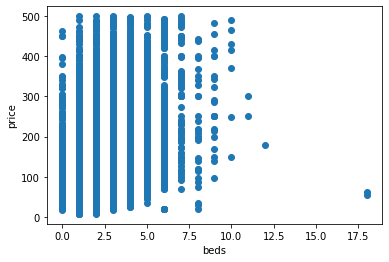

In [9]:
#Bed / Price correlation
plt.scatter(listings_AirBnb['beds'], listings_AirBnb['price'])
plt.xlabel('beds')
plt.ylabel('price')
plt.plot()

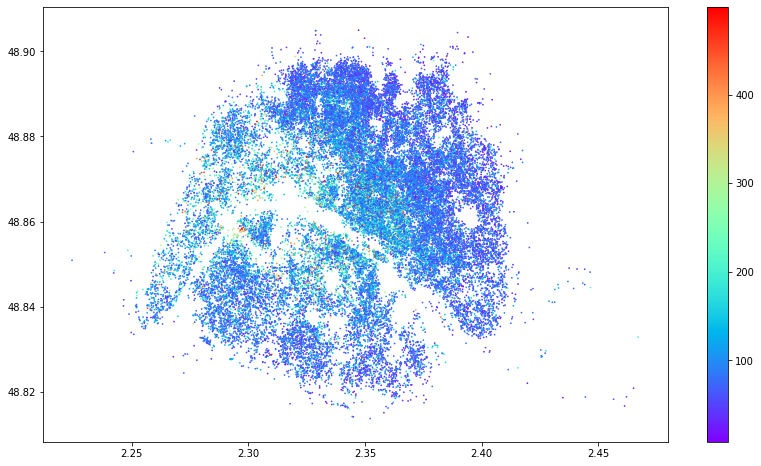

In [14]:
# Price / location correlation
plt.figure(figsize=(14, 8))
plt.set_cmap(cmap = 'rainbow')
plt.scatter(listings_AirBnb['longitude'], listings_AirBnb['latitude'], s=0.5, c = listings_AirBnb['price'])
plt.colorbar()
plt.show()

In [15]:
#Encoding categorical columns
categorical_columns = ['room_type','instant_bookable','host_is_superhost', 'neighbourhood_cleansed', 
                       'host_identity_verified', 'has_availability', 'host_has_profile_pic']

dummies = pd.get_dummies(listings_AirBnb[categorical_columns], drop_first=True)

dummies

,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Buttes-Chaumont,neighbourhood_cleansed_Buttes-Montmartre,neighbourhood_cleansed_Entrepôt,neighbourhood_cleansed_Gobelins,...,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Popincourt,neighbourhood_cleansed_Reuilly,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Vaugirard,neighbourhood_cleansed_Élysée,host_identity_verified_t,has_availability_t,host_has_profile_pic_t
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
7,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
67502,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
67503,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
67511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [16]:
### Scaling quantitative columns
quantitative_columns = [x for x in listings_AirBnb.columns if x not in categorical_columns]

scaled = (listings_AirBnb[quantitative_columns] - listings_AirBnb[quantitative_columns].mean())/listings_AirBnb[quantitative_columns].std()
scaled = scaled.drop(columns=['price'])
scaled.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,day_first_review,day_last_review
count,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,...,3.970900e+04,3.970900e+04,3.970900e+04,39709.000000,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04,3.970900e+04
mean,3.922309e-16,-3.092039e-16,-2.290399e-17,-2.290399e-17,3.142929e-14,-9.372744e-15,-2.862999e-18,1.574650e-17,1.789375e-17,3.578749e-18,...,-5.496959e-16,4.383968e-17,3.292449e-16,0.000000,1.145200e-17,3.435599e-17,-8.588998e-18,-1.717800e-17,1.374240e-16,-3.435599e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.538677e+00,-3.313248e+00,-1.640097e-01,-1.640097e-01,-2.748583e+00,-3.764945e+00,-1.416163e+00,-4.577563e-01,-1.635431e+00,-7.387615e-02,...,-1.060012e+01,-1.122217e+01,-7.973634e+00,-0.187814,-2.065508e-01,-2.322488e-01,-6.213692e-02,-7.285956e-01,-3.996719e+00,-6.168068e+00
25%,-3.839222e-02,-1.524004e-02,-1.468373e-01,-1.468373e-01,-7.212232e-01,-6.200838e-01,-7.871567e-01,-4.577563e-01,-7.142121e-01,-5.541374e-02,...,3.863413e-01,4.666753e-01,-3.170469e-01,-0.187814,-1.735514e-01,-2.322488e-01,-6.213692e-02,-5.817980e-01,-6.881537e-01,-2.430432e-01
50%,-3.839222e-02,-1.524004e-02,-1.468373e-01,-1.468373e-01,6.821992e-02,7.689708e-02,-1.581505e-01,-4.577563e-01,2.070069e-01,-5.541374e-02,...,3.863413e-01,4.666753e-01,-3.170469e-01,-0.187814,-1.735514e-01,-2.322488e-01,-6.213692e-02,-3.340771e-01,2.316723e-01,4.027824e-01
75%,6.470184e-01,8.389391e-01,-1.296650e-01,-1.296650e-01,8.191139e-01,7.563690e-01,4.708557e-01,8.953065e-01,2.070069e-01,-1.848891e-02,...,3.863413e-01,4.666753e-01,7.767512e-01,-0.187814,-1.735514e-01,-2.322488e-01,-6.213692e-02,1.797144e-01,8.579966e-01,5.812342e-01
max,6.470184e-01,8.389391e-01,1.891445e+01,1.891445e+01,2.203083e+00,3.688972e+00,8.018930e+00,6.584232e+01,1.494651e+01,1.845133e+02,...,3.863413e-01,4.666753e-01,7.767512e-01,10.206095,1.022125e+01,2.119319e+01,3.067551e+01,3.983341e+01,1.464660e+00,9.445111e-01


In [17]:
X = pd.concat([dummies, scaled], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39709 entries, 0 to 67530
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   room_type_Hotel room                          39709 non-null  uint8  
 1   room_type_Private room                        39709 non-null  uint8  
 2   room_type_Shared room                         39709 non-null  uint8  
 3   instant_bookable_t                            39709 non-null  uint8  
 4   host_is_superhost_t                           39709 non-null  uint8  
 5   neighbourhood_cleansed_Bourse                 39709 non-null  uint8  
 6   neighbourhood_cleansed_Buttes-Chaumont        39709 non-null  uint8  
 7   neighbourhood_cleansed_Buttes-Montmartre      39709 non-null  uint8  
 8   neighbourhood_cleansed_Entrepôt               39709 non-null  uint8  
 9   neighbourhood_cleansed_Gobelins               39709 non-null 

In [18]:
### Any duplicates ?
X.duplicated().sum() #Nope

0

In [19]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# III. Model Training and Optimization

First, you have to select an evaluation metric. Which one could you use?
The most used metrics in regression are the following:
- mean squared error
- mean absolute error
- R-square

All of them are available on scikit-learn.

Select a model and train it. Do not forget to use gridsearch to optimize the hyperparameters if any.

There are several regression models available on scikit-learn, among them:
- linear regression
- ridge regression
- LASSO
- PLS regression

Feel free to try all the models you want.

In [20]:
# TODO: Train, optimize and evaluate models
# Implement model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

params= {"max_depth":[5, 10], "n_estimators":[10,30], "min_samples_split": [10, 20]}

grid = GridSearchCV(GradientBoostingRegressor(), params, 
                    scoring="neg_mean_squared_error", cv=5)

grid.fit(X_train, Y_train)

print('best params are:', grid.best_params_)

print('the optimized mean_squared_error is:', mean_squared_error(Y_test, grid.predict(X_test)))

best params are: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 30}
the optimized mean_squared_error is: 1809.826414720987


In [21]:
from sklearn.metrics import r2_score
print('the optimized mean_squared_error is:', r2_score(Y_test, grid.predict(X_test)))

the optimized mean_squared_error is: 0.6191276163064824
